<center><h2>Gabriel Coutinho Chaves - 15111760 (nUSP)</h2>

<center><h2>Theo Urbano Gaudencio de Sene - 12558717 (nUSP)</h2>
<center><h2>Ian De Holanda - 13835412 (nUSP)</h2>

# Introdução

In [5]:
# Bibliotecas 

import numpy as np
import sympy as smp
import matplotlib.pyplot as plt


plt.style.use('default')

$$f(x) = 63x^5 - 381x^4 + 496x^3 + 204x^2 - 544x + 192$$

In [6]:
# Definição do conjunto dominio

N = 100
x1 = np.linspace(0,1,N) # intervalo [0,1]
x2 = np.linspace(1,2,N) # intervalo [1,2]

# Definicao da funcao e sua primeira derivada

f =  lambda x : 63*x**5 - 381*x**4 + 496*x**3 + 204*x**2 - 544*x + 192
dfdx = lambda x : 5*63*x**4 - 381*4*x**3 + 496*3*x**2 - 209*2*x - 544

# Análise do Intervalo e Cálculo da Solução Exata

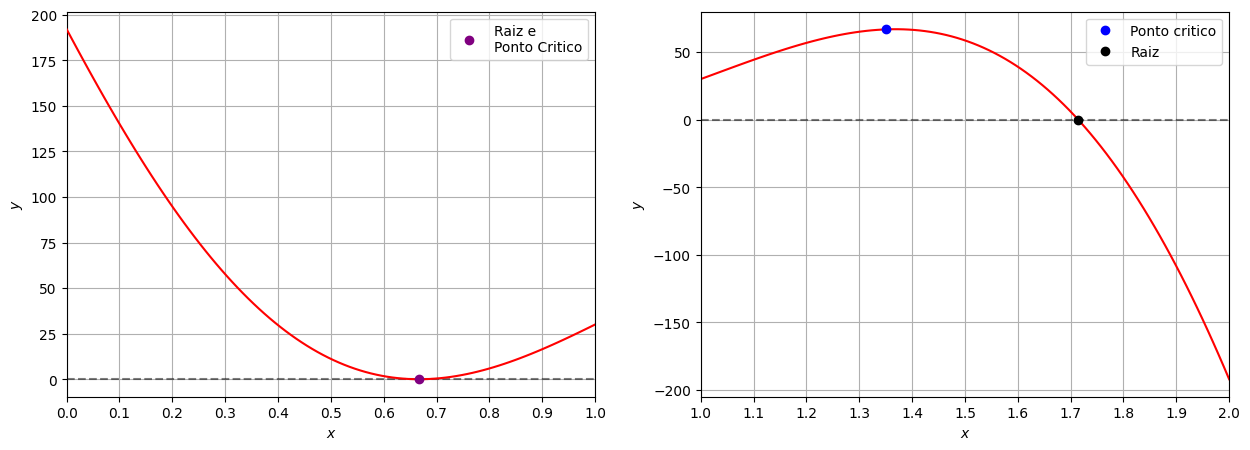

In [7]:
# Analise Grafica

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(x1,f(x1),'r', zorder=3)
ax[0].hlines(0,0,1,color='black',linestyles='--',alpha=0.5)
ax[0].set_xticks(np.arange(0,1.05,0.1))
ax[0].set_xlim(0,1)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].plot(2/3,0,'o',color='purple', zorder = 4, label='Raiz e\nPonto Critico')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(x2,f(x2),'r')
ax[1].hlines(0,1,2,color='black',linestyles='--',alpha=0.5)
ax[1].set_xticks(np.arange(1,2.05,0.1))
ax[1].plot(1.35,f(1.35),'o',color='blue',label='Ponto critico')
ax[1].plot(12/7,0,'o',color='black', label='Raiz')
ax[1].set_xlim(1,2)
ax[1].set_ylabel(r'$y$')
ax[1].set_xlabel(r'$x$')
ax[1].grid(True)
ax[1].legend()

plt.show()

In [8]:
# Solucao Exata usando Sympy (Computação Simbólica)

x = smp.symbols('x')
h =  63*x**5 - 381*x**4 + 496*x**3 + 204*x**2 - 544*x + 192 # funcao (1)
sol = smp.solve(h,x,numerical=True) # metodo da biblioteca que encontra as raizes
print(sol) # conjunto das raizes 

[-1, 2/3, 12/7, 4]


In [57]:
# raiz no intervalo [0,1]
sol[1].evalf()

0.666666666666667

In [59]:
# raiz no intervalo [1,2]
sol[2].evalf()

1.71428571428571

# Método da Bisseção

In [53]:
from numpy.linalg import norm
from numpy import round

np.set_printoptions(precision=8) # precisão

# Método da Bisseção

def bissecao(f, a, b, e, kmax):
    fa, fb = f(a), f(b)  # valor de f(a0) e f(b0)
    
    # checa se alguma das extremidades ja eh raiz ou se existe uma raiz entre as extremidades
    if fa == 0:
        return a
    elif fb == 0:
        return b
    elif fa * fb > 0:
        print('Erro. f(a) e f(b) têm o mesmo sinal.')
        return np.nan
    
    print(f'{"k":^3}|{"a":^12}|{"b":^12}|{"x":^12}|{"f(x)":^12}|{"erro":^12}')  # Cabecalho da tabela
    
    x0 = a  # declara-se uma variavel x0 com o valor de a0
    for k in range(1, kmax + 1):
        x = (a + b) / 2
        fx = f(x)
        erro = norm(x - x0)
        
        print(f'{k:^3}|{a:^12.8f}|{b:^12.8f}|{x:^12.8f}|{fx:^12.8f}|{erro:^12.8f}')  # Corpo da tabela
        
        if fx == 0 or erro < e * (1 + norm(x)):
            return x
        
        if fx * fa < 0:
            b = x
        else:
            a, fa = x, fx
        
        x0 = x

    
    print('Número máximo de iterações atingido')
    return None


In [26]:
bissecao(f,0,1,10e-6,50)

Erro. f(a) e f(b) têm o mesmo sinal.


nan

In [63]:
bissecao(f,1,2,10e-6,50)

 k |     a      |     b      |     x      |    f(x)    |    erro    
 1 | 1.00000000 | 2.00000000 | 1.50000000 |58.59375000 | 0.50000000 
 2 | 1.50000000 | 2.00000000 | 1.75000000 |-16.33886719| 0.25000000 
 3 | 1.50000000 | 1.75000000 | 1.62500000 |32.20687866 | 0.12500000 
 4 | 1.62500000 | 1.75000000 | 1.68750000 |10.92908192 | 0.06250000 
 5 | 1.68750000 | 1.75000000 | 1.71875000 |-1.93078968 | 0.03125000 
 6 | 1.68750000 | 1.71875000 | 1.70312500 | 4.68964237 | 0.01562500 
 7 | 1.70312500 | 1.71875000 | 1.71093750 | 1.42743798 | 0.00781250 
 8 | 1.71093750 | 1.71875000 | 1.71484375 |-0.23962526 | 0.00390625 
 9 | 1.71093750 | 1.71484375 | 1.71289062 | 0.59691308 | 0.00195312 
10 | 1.71289062 | 1.71484375 | 1.71386719 | 0.17939633 | 0.00097656 
11 | 1.71386719 | 1.71484375 | 1.71435547 |-0.02992627 | 0.00048828 
12 | 1.71386719 | 1.71435547 | 1.71411133 | 0.07478207 | 0.00024414 
13 | 1.71411133 | 1.71435547 | 1.71423340 | 0.02243966 | 0.00012207 
14 | 1.71423340 | 1.71435547 | 1.7

1.7142791748046875

# Método de Newton

In [12]:
# Método de Newton

from numpy.linalg import norm

def m_newton(f, dfdx, x0, e, kmax):
    k = 0
    fx0 = f(x0)
    dfdx0 = dfdx(x0)
    print(f'{"k":^3}|{"x":^12}|{"f(x)":^12}|{"df(x)dx":^12}|{"erro":^12}')
    while k<kmax+1:
        x = x0 - fx0/dfdx0
        print(f'{k:^3}|{x0:^12.8f}|{fx0:^12.8f}|{dfdx0:^12.8f}|{norm(x-x0):^12.8f}')  # Corpo da tabela
        if norm(x-x0)<e*(1+norm(x)):
            return (x)
        x0 = x
        fx0 = f(x0)
        dfdx0 = dfdx(x0)
        k+=1
        
    print('Número máximo de iterações atingido')
    return None

In [13]:
x0 = 0.5
m_newton(f, dfdx, x0, 10e-6, 50)

 k |     x      |    f(x)    |  df(x)dx   |    erro    
 0 | 0.50000000 |11.15625000 |-551.81250000| 0.02021747 
 1 | 0.52021747 | 8.53496093 |-550.24450620| 0.01551122 
 2 | 0.53572868 | 6.77249764 |-549.24920100| 0.01233046 
 3 | 0.54805914 | 5.52330266 |-548.60085833| 0.01006798 
 4 | 0.55812712 | 4.60184133 |-548.17252873| 0.00839488 
 5 | 0.56652200 | 3.90049239 |-547.88878568| 0.00711913 
 6 | 0.57364113 | 3.35300164 |-547.70277745| 0.00612194 
 7 | 0.57976307 | 2.91660329 |-547.58432248| 0.00532631 
 8 | 0.58508938 | 2.56260472 |-547.51338240| 0.00468044 
 9 | 0.58976982 | 2.27112548 |-547.47631297| 0.00414835 
10 | 0.59391818 | 2.02801024 |-547.46362380| 0.00370437 
11 | 0.59762255 | 1.82294164 |-547.46859350| 0.00332976 
12 | 0.60095231 | 1.64824549 |-547.48638821| 0.00301057 
13 | 0.60396288 | 1.49811118 |-547.51348600| 0.00273621 
14 | 0.60669909 | 1.36806941 |-547.54729245| 0.00249854 
15 | 0.60919763 | 1.25463410 |-547.58587879| 0.00229121 
16 | 0.61148884 | 1.15505170 |-5

In [64]:
x0 = 1.5
m_newton(f, dfdx, x0, 10e-6, 100)

 k |     x      |    f(x)    |  df(x)dx   |    erro    
 0 | 1.50000000 |58.59375000 |-1371.81250000| 0.04271265 
 1 | 1.54271265 |51.83184738 |-1458.75577431| 0.03553155 
 2 | 1.57824420 |44.46861836 |-1534.05546587| 0.02898762 
 3 | 1.60723182 |37.22211664 |-1597.39979190| 0.02330169 
 4 | 1.63053351 |30.55380397 |-1649.51396792| 0.01852291 
 5 | 1.64905642 |24.69927894 |-1691.67202871| 0.01460051 
 6 | 1.66365694 |19.73034786 |-1725.34471729| 0.01143560 
 7 | 1.67509253 |15.61649255 |-1751.98293617| 0.00891361 
 8 | 1.68400614 |12.27278062 |-1772.90398505| 0.00692242 
 9 | 1.69092856 | 9.59228436 |-1789.24499317| 0.00536108 
10 | 1.69628964 | 7.46567714 |-1801.95562842| 0.00414310 
11 | 1.70043274 | 5.79172207 |-1811.81121618| 0.00319665 
12 | 1.70362938 | 4.48191520 |-1819.43468071| 0.00246336 
13 | 1.70609274 | 3.46168764 |-1825.32074554| 0.00189648 
14 | 1.70798922 | 2.66976701 |-1829.85900131| 0.00145900 
15 | 1.70944822 | 2.05668770 |-1833.35432637| 0.00112182 
16 | 1.71057004 

7.034577259101837e-05

# Método das Secantes

In [41]:
# Método das Secantes

from numpy.linalg import norm

def m_secantes(f, x0, x1, e, kmax):
    k = 0
    fx0 = f(x0)
    fx1 = f(x1)
    print(f'{"k":^3}|{"x":^15}|{"f(x)":^15}|{"erro":^15}')
    while k<kmax+1:
        x = x1 - fx1*(x1-x0)/(fx1-fx0)
        print(f'{k:^3}|{x0:^15.8f}|{fx0:^15.8f}|{norm(x-x0):^15.8f}')  # Corpo da tabela
        if norm(x-x0)<e*(1+norm(x)):
            return (x)
        x0 = x1
        x1 = x
        fx0 = f(x0)
        fx1 = f(x1)
        k+=1
        
    print('Número máximo de iterações atingido')
    return None

In [65]:
x0 = 0
x1 = 1
m_secantes(f, x0, x1, 10e-6, 50)

 k |       x       |     f(x)      |     erro      
 0 |  0.00000000   | 192.00000000  |  1.18518519   
 1 |  1.00000000   |  30.00000000  |  0.22112026   
 2 |  1.18518519   |  55.12458893  |  0.44026398   
 3 |  0.77887974   |  4.25188153   |  0.06785974   
 4 |  0.74492121   |  2.12414469   |  0.05055456   
 5 |  0.71102000   |  0.69972187   |  0.02750987   
 6 |  0.69436665   |  0.27613880   |  0.01730142   
 7 |  0.68351014   |  0.10286371   |  0.01044211   
 8 |  0.67706523   |  0.03937587   |  0.00644683   
 9 |  0.67306803   |  0.01496182   |  0.00396195   
10 |  0.67061840   |  0.00571108   |  0.00244491   
11 |  0.66910608   |  0.00217845   |  0.00150853   
12 |  0.66817349   |  0.00083170   |  0.00093163   
13 |  0.66759756   |  0.00031754   |  0.00057545   
14 |  0.66724186   |  0.00012127   |  0.00035554   
15 |  0.66702210   |  0.00004631   |  0.00021969   
16 |  0.66688632   |  0.00001769   |  0.00013576   
17 |  0.66680241   |  0.00000676   |  0.00008390   
18 |  0.6667

7.560856452037967e-06

In [67]:
x0 = 1.1
x1 = 1.9
m_secantes(f, x0, x1, 10e-6, 50)

 k |       x       |     f(x)      |     erro      
 0 |  1.10000000   |  44.25603000  |  0.23195021   
 1 |  1.90000000   | -108.38373000 |  0.35238931   
 2 |  1.33195021   |  66.33029717  |  0.92785304   
 3 |  1.54761069   |  50.91317478  |  0.06644300   
 4 |  2.25980325   | -494.81747692 |  0.60269403   
 5 |  1.61405370   |  35.34899450  |  0.11399451   
 6 |  1.65710922   |  21.99774066  |  0.05562954   
 7 |  1.72804821   |  -6.05385213  |  0.01380096   
 8 |  1.71273877   |  0.66170252   |  0.00154706   
 9 |  1.71424725   |  0.01649881   |  0.00003846   
10 |  1.71428582   |  -0.00004708  |  0.00000011   


1.7142857142857149